***DATA PREPROCESSING***

In [1]:
import pandas as pd
import numpy as np

from googletrans import Translator


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
dataset = pd.read_csv("12th_gen_dataset.csv")

In [3]:
df = pd.DataFrame(data = dataset)

In [4]:
df.head()

,title,rating,review,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,"12th generation, perfect!",5.0 out of 5 stars,I switched from an i9 9900k and feel the evolu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Wow, what a beast!",5.0 out of 5 stars,"I upgraded from a 12500, which was already gre...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Super happy,5.0 out of 5 stars,"Super happy, I’ve always had the i7 K series a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Magnificent,5.0 out of 5 stars,"Prompt delivery, perfect packaging, and reliab...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Works great,4.0 out of 5 stars,Costs a lot and I do not recommend to anyone w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(1380, 14)

In [6]:
df = df.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])

In [7]:
#REMOVING DUPLICATE ELEMENTS

duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()

In [8]:

df['rating'] = df['rating'].str.extract('(\d+\.?\d*)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Snega\AppData\Local\Temp\ipykernel_4708\3302454865.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['rating'] = df['rating'].str.extract('(\d+\.?\d*)').astype(float)


In [9]:

df['review'].fillna('', inplace=True)


df['review_length'] = df['review'].apply(len)

C:\Users\Snega\AppData\Local\Temp\ipykernel_4708\199517450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review'].fillna('', inplace=True)


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
df.head()

In [12]:
translator = Translator()

In [14]:
def translate_text(review):
    try:
        
        translated = translator.translate(review, dest='en')
        return translated.Description
    except Exception as e:
        print(f"Error translating text: {review}. Error: {e}")
        return review

In [15]:
df['review'] = df['review'].apply(translate_text)

Error translating text: I switched from an i9 9900k and feel the evolution. The latest is always the best. I recommend buying it if you were hesitant; the satisfaction level is quite high.. Error: 'Translated' object has no attribute 'Description'
Error translating text: I upgraded from a 12500, which was already great, but this is on another level. Execution speed is amazing.. Error: 'Translated' object has no attribute 'Description'
Error translating text: Super happy, I’ve always had the i7 K series and expected worse performance because I came from an i7, but this is a step up.. Error: 'Translated' object has no attribute 'Description'
Error translating text: Prompt delivery, perfect packaging, and reliable courier. Now I’m waiting for the technician to install the components.. Error: 'Translated' object has no attribute 'Description'
Error translating text: Costs a lot and I do not recommend to anyone with a tight budget like Â£900 if you have a tight budge. Error: 'Translated' ob

In [18]:
df.tail()

,title,rating,review,review_length
1372,Awesome,5.0,This was a huge upgrade to my system for good ...,104
1373,As of 9/6/2022 this is the GOD of processors. ...,5.0,This thing is truly impressive. It also comes ...,267
1374,Insanely Fast Processor,5.0,"I love this processor, it can handle anything ...",300
1375,Excellent CPU,5.0,It will handle all your multitasking needs wit...,185
1376,NaN,NaN,,0


In [19]:
#REMOVING DUPLICATE ELEMENTS

duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()

In [21]:
df.shape

(1343, 4)

In [23]:
print(df.isnull().sum())

title            1
rating           2
review           0
review_length    0
dtype: int64


In [24]:
df = df.dropna()

In [25]:
print(df.isnull().sum())

title            0
rating           0
review           0
review_length    0
dtype: int64


In [26]:

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Snega\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
#TEST PREPROCESSING

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatization
    return text

In [28]:
df.head()

,title,rating,review,review_length
0,"12th generation, perfect!",5.0,I switched from an i9 9900k and feel the evolu...,164
1,"Wow, what a beast!",5.0,"I upgraded from a 12500, which was already gre...",107
2,Super happy,5.0,"Super happy, I’ve always had the i7 K series a...",125
3,Magnificent,5.0,"Prompt delivery, perfect packaging, and reliab...",119
4,Works great,4.0,Costs a lot and I do not recommend to anyone w...,101


In [29]:
preprocessed_text = df['review'].apply(preprocess_text)

In [30]:
df['review'] = preprocessed_text

In [31]:
df.head()

,title,rating,review,review_length
0,"12th generation, perfect!",5.0,switched k feel evolution latest always best r...,164
1,"Wow, what a beast!",5.0,upgraded already great another level execution...,107
2,Super happy,5.0,super happy i’ve always k series expected wors...,125
3,Magnificent,5.0,prompt delivery perfect packaging reliable cou...,119
4,Works great,4.0,cost lot recommend anyone tight budget like â£...,101


***FEATURE EXTRACTION***

In [32]:
#VECTORIZATION

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()


tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])


df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_matrix)
print(df_tfidf)

  (0, 5871)	0.3236843646794612
  (0, 2224)	0.2578471142557225
  (0, 2068)	0.35660298989133055
  (0, 3284)	0.2756418822031882
  (0, 197)	0.2406121744490885
  (0, 554)	0.19127354617809098
  (0, 4940)	0.19751089482485548
  (0, 747)	0.2496856813609624
  (0, 2747)	0.33734682856709297
  (0, 5249)	0.35660298989133055
  (0, 3325)	0.27150957814335425
  (0, 4821)	0.28016830916682367
  (0, 2755)	0.19127354617809098
  (1, 3325)	0.3916342463582111
  (1, 6330)	0.3183054363847692
  (1, 182)	0.3244441683919899
  (1, 2623)	0.2125007724887444
  (1, 242)	0.34415135067490676
  (1, 2096)	0.5143757511252074
  (1, 5645)	0.3144987160813135
  (1, 201)	0.3360828195574361
  (2, 197)	0.3045879348156368
  (2, 5824)	0.27600596532299254
  (2, 2686)	0.3020292958387795
  (2, 6409)	0.37610446994682617
  :	:
  (1339, 3298)	0.21870392668536795
  (1339, 6019)	0.17711097992957
  (1339, 5735)	0.2795599768767204
  (1339, 6042)	0.25016644718086767
  (1339, 3428)	0.2718284672578138
  (1339, 1117)	0.3012219969536666
  (1339, 42

In [33]:
print(df_tfidf.isnull().sum())

aaa            0
abbastanza     0
abbia          0
abbinamento    0
abbinato       0
              ..
ˆã             0
ˆå             0
ˆç             0
ˆè²            0
ˆï¼            0
Length: 6990, dtype: int64


In [34]:
#CALCULATING SENTIMENT SCORE USING VADER
def calculate_sentiment_scores(text):
    
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

In [35]:

df['sentiment_scores'] = df['review'].apply(calculate_sentiment_scores)

In [36]:

def map_rating_to_sentiment(sentiment_scores):
    if sentiment_scores > 0.5:
        return 1
    elif sentiment_scores < 0:
        return -1
    else:
        return 0


df_tfidf['sentiment'] = df['sentiment_scores'].apply(map_rating_to_sentiment)
df['sentiment'] = df['sentiment_scores'].apply(map_rating_to_sentiment)

In [37]:
print("Number of positive sentiments:", df[df['sentiment'] == 1].shape[0])
print("Number of negative sentiments:", df[df['sentiment'] == -1].shape[0])
print("Number of neutral sentiments:", df[df['sentiment'] == 0].shape[0])

Number of positive sentiments: 496
Number of negative sentiments: 230
Number of neutral sentiments: 615


In [38]:
#UPSAMPLING

from sklearn.utils import resample

df_majority = df[df['sentiment'] == 0]  
df_minority1 = df[df['sentiment'] == 1]
df_minority2 = df[df['sentiment'] == -1]


df_minority1_upsampled = resample(df_minority1, 
                                  replace=True,    
                                  n_samples=len(df_majority),    
                                  random_state=42)  

df_minority2_upsampled = resample(df_minority2, 
                                  replace=True,     
                                  n_samples=len(df_majority),    
                                  random_state=42)


df = pd.concat([df_majority, df_minority1_upsampled, df_minority2_upsampled])


df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [39]:
print("Number of positive sentiments:", df[df['sentiment'] == 1].shape[0])
print("Number of negative sentiments:", df[df['sentiment'] == -1].shape[0])
print("Number of neutral sentiments:", df[df['sentiment'] == 0].shape[0])

Number of positive sentiments: 615
Number of negative sentiments: 615
Number of neutral sentiments: 615


In [40]:
df_tfidf.isnull().sum().sum()

35

In [41]:

df_tfidf.dropna(inplace=True)

In [42]:
df_tfidf.isnull().sum().sum()

0

In [43]:

df_tfidf['sentiment'] = df_tfidf['sentiment'].astype(int)



print(df_tfidf['sentiment'])

0       1
1       1
2       1
3       1
4       1
       ..
1336    1
1337    0
1338    1
1339    0
1340    0
Name: sentiment, Length: 1306, dtype: int32


In [44]:
df_tfidf.head()

,aaa,abbastanza,abbia,abbinamento,abbinato,aber,abgehã,abierta,abierto,abimã,...,ƒå,ƒå¾œå,ƒæ,ˆcore,ˆã,ˆå,ˆç,ˆè²,ˆï¼,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


***EXPLORATORY DATA ANALYSIS***

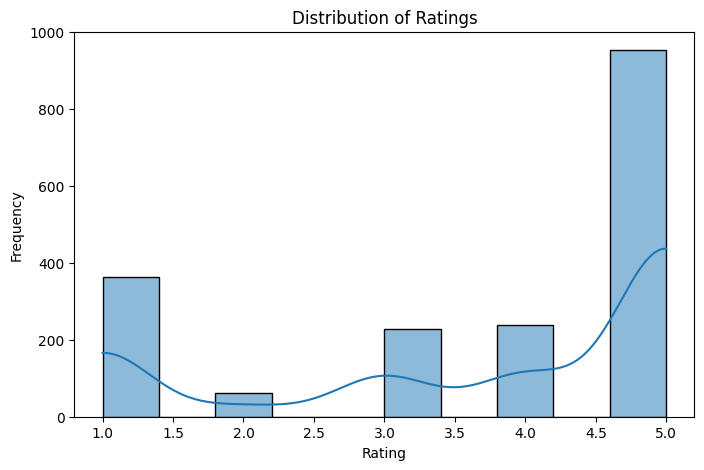

In [45]:
#BAR GRAPH

import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=10, kde=True,edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



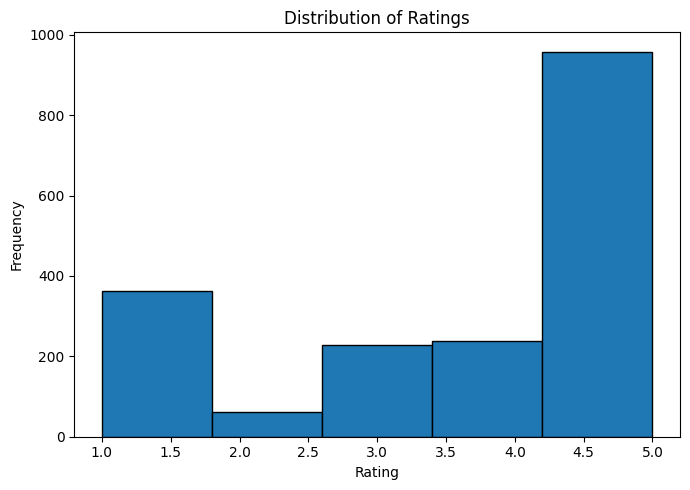

In [78]:
#HISTOGRAM

plt.figure(figsize=(7,5))
plt.hist(df['rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

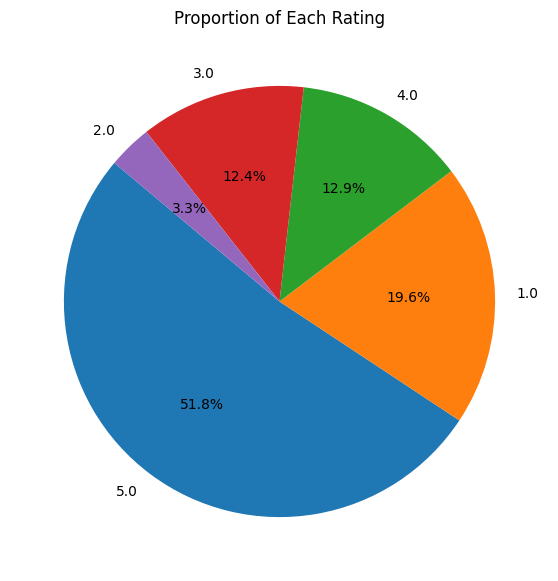

In [79]:
#PIE CHART

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Rating')
plt.show()

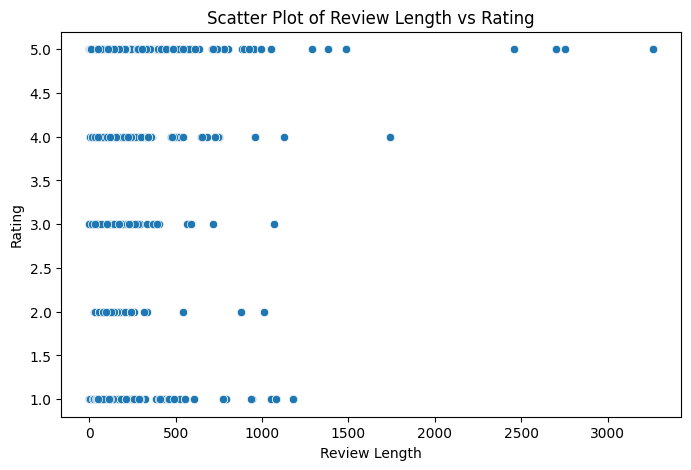

In [80]:
#SCATTER PLOT

df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(8,5))
sns.scatterplot(x='review_length', y='rating', data=df)
plt.title('Scatter Plot of Review Length vs Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()


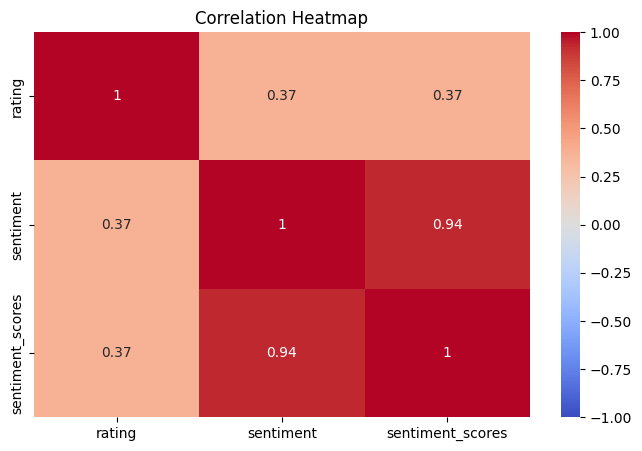

In [81]:
#HEATMAP

import seaborn as sns
import matplotlib.pyplot as plt

subset_df = df[['rating', 'sentiment', 'sentiment_scores']]

plt.figure(figsize=(8,5))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


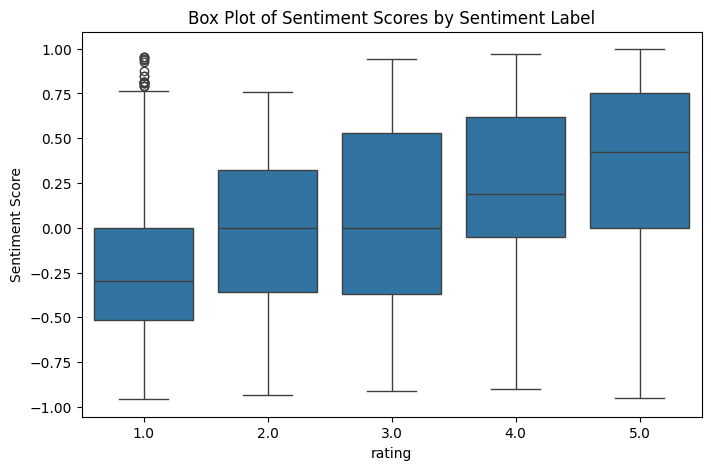

In [82]:
#BOX PLOT

plt.figure(figsize=(8,5))
sns.boxplot(x='rating', y='sentiment_scores', data=df)
plt.title('Box Plot of Sentiment Scores by Sentiment Label')
plt.xlabel('rating')
plt.ylabel('Sentiment Score')
plt.show()

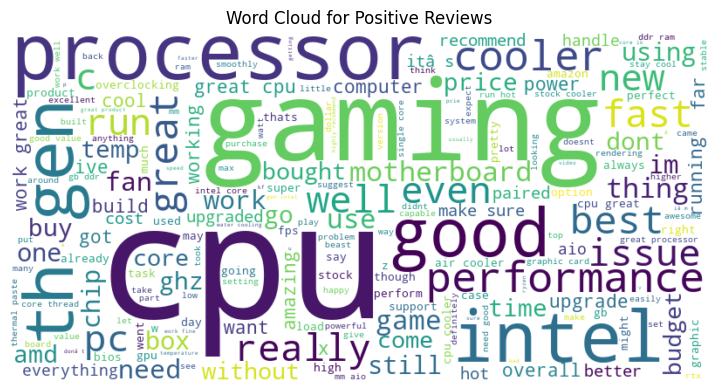

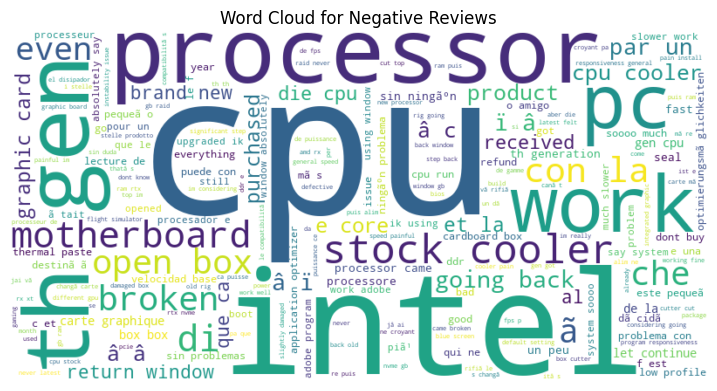

In [83]:
#WORDCLOUD

from wordcloud import WordCloud

positive_text = ' '.join(df[df['sentiment_scores'] > 0.6]['review'])
negative_text = ' '.join(df[df['sentiment_scores'] < 0]['review'])


plt.figure(figsize=(9, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


plt.figure(figsize=(9, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

***MODEL TRAINING AND EVALUATION***

In [46]:
#SPLITTING DATASET INTO TESTING AND TRAINING SETS

from sklearn.model_selection import train_test_split

In [47]:
print(df_tfidf.isnull().sum())

aaa            0
abbastanza     0
abbia          0
abbinamento    0
abbinato       0
              ..
ˆå             0
ˆç             0
ˆè²            0
ˆï¼            0
sentiment      0
Length: 6991, dtype: int64


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1845 non-null   object 
 1   rating            1845 non-null   float64
 2   review            1845 non-null   object 
 3   review_length     1845 non-null   int64  
 4   sentiment_scores  1845 non-null   float64
 5   sentiment         1845 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 86.6+ KB


In [49]:
X = df_tfidf.drop(columns='sentiment')
y = df_tfidf['sentiment']

In [50]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [51]:
print(X_train.shape)
print(y_train.shape)

(979, 6990)
(979,)


In [53]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (979, 6990)
Shape of X_test: (327, 6990)
Shape of y_train: (979,)
Shape of y_test: (327,)


***SUPERVISED***

***SVM ACCURACY-58%***

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


param_distributions = {
    'C': expon(scale=1.0),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(expon(scale=0.1).rvs(10)),
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5, 1.0]
}


svm = SVC()


random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


random_search.fit(X_train, y_train)


print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")


best_svm = random_search.best_estimator_


y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")




Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 3.636812255969223, 'coef0': 0.1, 'degree': 5, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.4729408686551544
Test set accuracy: 0.4709480122324159


***LOGISTIC REGRESSION ACCURACY-63%***

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


param_distributions = {
    'penalty': ['l1', 'l2'],  
    'C': uniform(0.001, 100)  
}


logistic_regression = LogisticRegression(solver='liblinear')  


random_search = RandomizedSearchCV(logistic_regression, param_distributions, n_iter=100, cv=10, scoring='accuracy', random_state=42)


random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = random_search.best_estimator_


test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

KeyboardInterrupt: 

***XGBOOST ACCURACY-61%***

In [59]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform, randint
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


param_distributions = {
    'n_estimators': randint(50, 300),  
    'learning_rate': uniform(0.01, 0.6),  
    'max_depth': randint(3, 10),  
    'subsample': uniform(0.5, 0.5),  
    'colsample_bytree': uniform(0.5, 0.5),  
    'gamma': uniform(0, 5)  
}


random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train_encoded)


best_xgb_model = random_search.best_estimator_


y_pred = best_xgb_model.predict(X_test)


print("Best Parameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))




Best Parameters: {'colsample_bytree': 0.6354788212575649, 'gamma': 0.6659256261187485, 'learning_rate': 0.05572022775949789, 'max_depth': 8, 'n_estimators': 131, 'subsample': 0.7083195288692397}
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.09      0.14        57
           1       0.51      0.72      0.60       155
           2       0.48      0.40      0.44       115

    accuracy                           0.50       327
   macro avg       0.45      0.40      0.39       327
weighted avg       0.47      0.50      0.46       327

Accuracy: 0.4954128440366973


***RANDOM FOREST ACCURACY-82%***

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=20)


param_distributions = {
    'n_estimators': [100, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}


random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)


random_search.fit(X, y)

best_rf_model = random_search.best_estimator_

print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}
Best cross-validation score: 0.4885075046574572
0.6330275229357798


c:\Users\Snega\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


***DEEP LEARNING CLASSIFIERS***

***CNN ACCURACY-48%***

In [58]:
import tensorflow as tf

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout


model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=1104))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


history = model.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

KeyboardInterrupt: 

***LSTM ACCURACY-48%***

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


max_words = 1000
max_len = 20
tokenizer = Tokenizer(num_words=max_words)


model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10


c:\Users\Snega\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 0.4059 - loss: 0.6537 - val_accuracy: 0.4824 - val_loss: 0.4292
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.4033 - loss: 0.4359 - val_accuracy: 0.4824 - val_loss: -0.0708
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 363ms/step - accuracy: 0.3813 - loss: 0.1516 - val_accuracy: 0.4824 - val_loss: -0.1275
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 373ms/step - accuracy: 0.4337 - loss: 0.1036 - val_accuracy: 0.4824 - val_loss: -0.1167
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.4004 - loss: 0.3665 - val_accuracy: 0.4824 - val_loss: -0.0595
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 373ms/step - accuracy: 0.3933 - loss: 0.2502 - val_accuracy: 0.4824 - val_loss: -0.0411
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.3720 - loss: 0.2576 - val_accuracy: 0.4824 - val_loss: -0.0246
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.3787 - loss: 0.2090 - val_accuracy: 0.4824 - val_loss: -0.0

***UNSUPERVISED***

***K-MEANS***

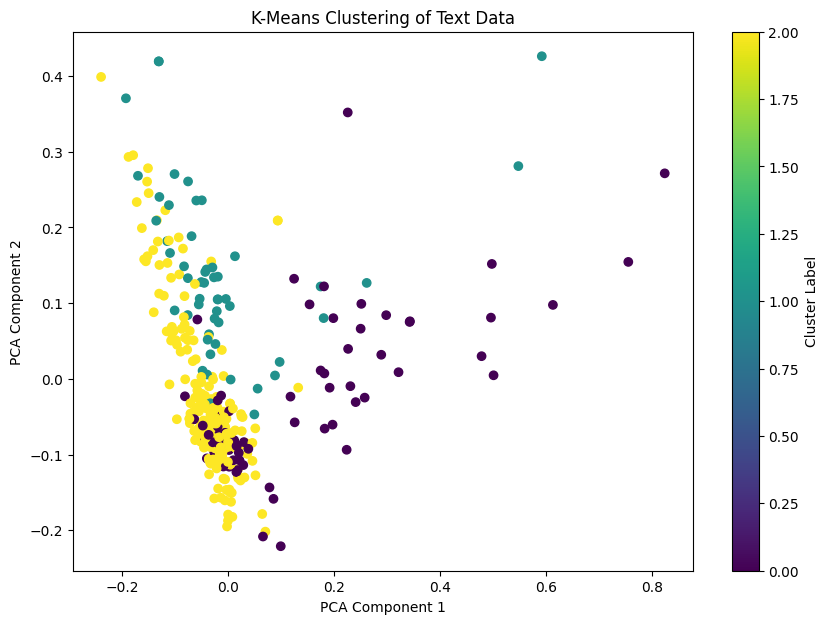

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)


clusters = kmeans.labels_


pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X)


plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering of Text Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()




***HIERARCHY CLUSTERING***

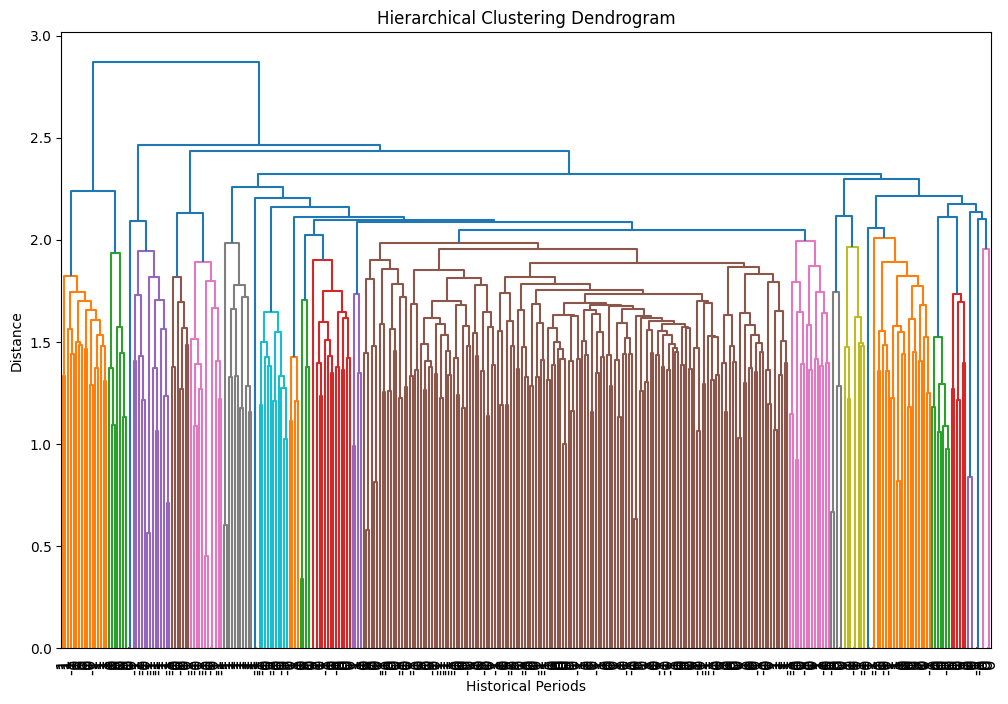

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


cosine_similarities = cosine_similarity(X)


Z = linkage(cosine_similarities, method='complete')


plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df_tfidf['sentiment'].tolist(), orientation='top', leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Historical Periods')
plt.ylabel('Distance')
plt.show()


UPON INVESTIGATING, RANDOM FOREST HAS THE HIGHEST ACCURACY-82%